In [18]:
import json
import matplotlib.pyplot as plt
import os

In [ ]:
with open(os.path.abspath(r'../../out/all_sensor_run__20250311T122554.json')) as file:
    raw_sensor_data = json.load(file)

print(raw_sensor_data[0])  # check there is something in there
print('length', len(raw_sensor_data))

{'message': 242, 'time': 1741695922.4513953, 'sensors': 1, 'type': 'routine', 'version': '1.7.7_161703', '1': {'time': 1741695922.4512463, 'sensor': '1', 'data': '765C,7C9F,AEA2,7A31,7D7D,AAFA,7E2A,7C61,A77E,7D37,80C5,B157,7D52,8023,ABCF,7962,8422,AB7B,7A17,837B,ADE1,7EE5,8473,AACB,826D,7D75,B54E,81A1,7F8F,B01C,8256,8334,ACD9,8315,8146,A071,7B05,7C56,B232,7F24,80A8,AE6A,7C68,8067,A933,7E59,803C,AC65', 'model': 'uSPa44', 'taxels': 16, 'calibrated': [0.0015396537571999997, 0.021352782354600003, 0.00579153839, -0.016070473116000003, -0.0010496609056000002, 0.04009873652, -0.010361374747160002, 0.007025055131, -0.072177029202, 0.007877973873400002, -0.011223301200200002, 0.013768079830800006, 0.011562457921999997, 0.010592922052999998, -0.0006602220409999999, 0.008772460358800001, 0.016519771117000003, 0.018545735655999998, -0.0009161107090000002, -0.0031669920583000007, 0.004791080052999999, -0.0026765979488000005, 0.006461128332000001, -0.010867848408000001, 0.02985828988949999, -0.00713

In [24]:
def convert_raw_sensor_data(data: list) -> list[dict]:
    """ 
        Extract the time, x, y, z forces from raw sensor readings.
        Returns an array of dicts.
    """
    out = []
    for reading in data:
        msg = reading['1']['calibrated']  # 'calibrated' field has the force readings, 'data' are just raw LSB readings
        msg = zip(msg[0::3], msg[1::3], msg[2::3])

        temp = {}
        for i, (x, y, z) in enumerate(msg):
            temp[str(i)] = {
                'time': reading['time'],  # keep it here for an easier plotting, 'has a UNIX timestamp of data creation', there is also a time for sensor reading
                'x': x,
                'y': y,
                'z': z,
            }
        out.append(temp)
    return out


proc_sensor_data = convert_raw_sensor_data(raw_sensor_data)
proc_sensor_data[0]  # check it works

{'0': {'time': 1741695922.4513953,
  'x': 0.0015396537571999997,
  'y': 0.021352782354600003,
  'z': 0.00579153839},
 '1': {'time': 1741695922.4513953,
  'x': -0.016070473116000003,
  'y': -0.0010496609056000002,
  'z': 0.04009873652},
 '2': {'time': 1741695922.4513953,
  'x': -0.010361374747160002,
  'y': 0.007025055131,
  'z': -0.072177029202},
 '3': {'time': 1741695922.4513953,
  'x': 0.007877973873400002,
  'y': -0.011223301200200002,
  'z': 0.013768079830800006},
 '4': {'time': 1741695922.4513953,
  'x': 0.011562457921999997,
  'y': 0.010592922052999998,
  'z': -0.0006602220409999999},
 '5': {'time': 1741695922.4513953,
  'x': 0.008772460358800001,
  'y': 0.016519771117000003,
  'z': 0.018545735655999998},
 '6': {'time': 1741695922.4513953,
  'x': -0.0009161107090000002,
  'y': -0.0031669920583000007,
  'z': 0.004791080052999999},
 '7': {'time': 1741695922.4513953,
  'x': -0.0026765979488000005,
  'y': 0.006461128332000001,
  'z': -0.010867848408000001},
 '8': {'time': 1741695922.

In [27]:
def prep_for_plotting(data: list) -> tuple[list, list, list, list]:
    """
        Prepares the processed data for plotting i.e., 16 arrays of time, x, y, z coordinates coming from each sensor.
        Returns a tuple of arrays time, x, y, z.
    """
    plot_data_t = [[] for _ in range(16)]  # 16 sensors
    plot_data_x = [[] for _ in range(16)]  # 16 sensors
    plot_data_y = [[] for _ in range(16)]  # 16 sensors
    plot_data_z = [[] for _ in range(16)]  # 16 sensors

    for e in data:
        for k, v in e.items():
            plot_data_t[int(k)].append(v['time'])
            plot_data_x[int(k)].append(v['x'])
            plot_data_y[int(k)].append(v['y'])
            plot_data_z[int(k)].append(v['z'])

    return plot_data_t, plot_data_x, plot_data_y, plot_data_y


ts, xs, ys, zs = prep_for_plotting(proc_sensor_data)
print('{}\n{}\n{}\n{}\n'.format(ts[0][:5], xs[0][:5], ys[0][:5], zs[0][:5]))
print(len(ts), len(xs), len(xs[0]))

[1741695922.4513953, 1741695922.4623878, 1741695922.4724207, 1741695922.4824302, 1741695922.492537]
[0.0015396537571999997, 0.0017697316367999997, -0.008172716858199999, 0.0012913592117999996, 0.001951305249]
[0.021352782354600003, 0.021288326314400006, 0.0192989399824, 0.0242631822764, 0.002722878610000001]
[0.021352782354600003, 0.021288326314400006, 0.0192989399824, 0.0242631822764, 0.002722878610000001]

16 16 2517


In [16]:
xs[0]

[0.026725477181,
 0.026725477181,
 0.0407767320372,
 0.0335973959462,
 0.021675162676,
 0.0211538783982,
 0.0211538783982,
 0.0231711251112,
 0.028873639705199995,
 0.025993949330799997,
 0.016452635731199997,
 0.025679105969000002,
 0.025679105969000002,
 0.029177338524200007,
 0.029177338524200007,
 0.0180902002758,
 0.029820103916199995,
 0.0208592036342,
 0.0277908375032,
 0.0277908375032,
 0.032427425505,
 0.032427425505,
 0.024177052214200006,
 0.0281708854088,
 0.035419154003200004,
 0.035419154003200004,
 0.019216304467199994,
 0.019216304467199994,
 0.0241517580842,
 0.018082487843800003,
 0.028264690422200003,
 0.030422787955799994,
 0.030422787955799994,
 0.018153300830800002,
 0.020968637198199996,
 0.0317801020962,
 0.030782719308199997,
 0.0239446505208,
 0.0239446505208,
 0.026949721500799998,
 0.025877017859199998,
 0.0205110174232,
 0.0205110174232,
 0.021338034143999998,
 0.0217456235018,
 0.028705259235800005,
 0.0239638228628,
 0.05050818186119999,
 0.03022212910019

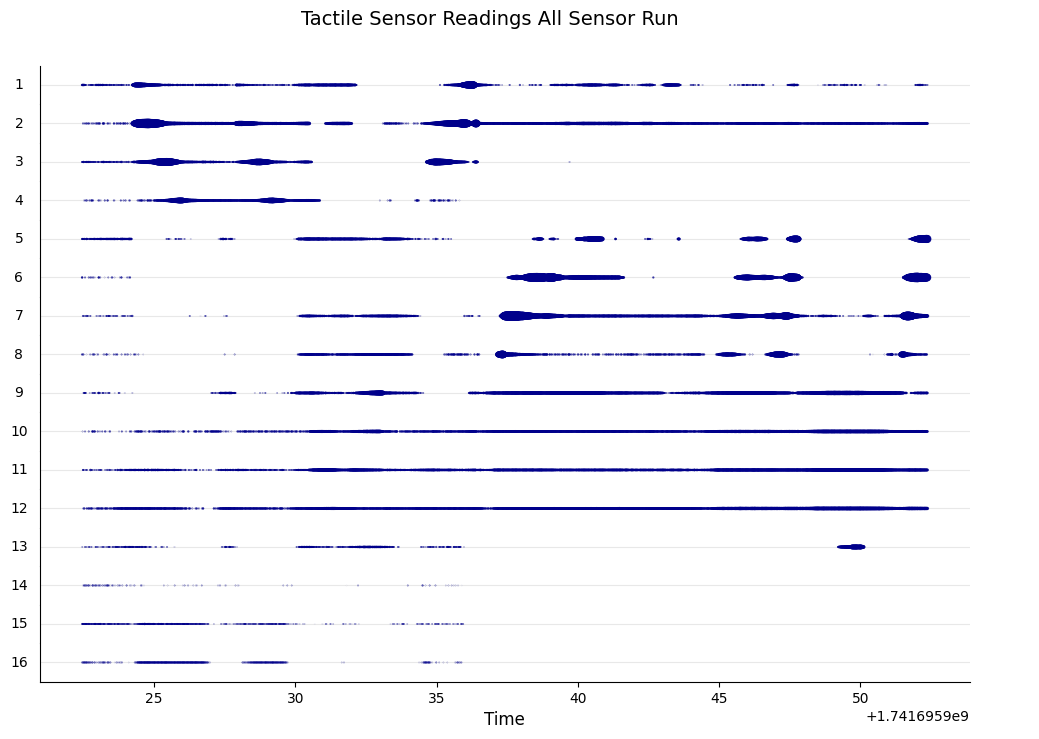

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

# Generate sample data (replace with your actual sensor data)
num_sensors = 16
time_steps = np.asarray(ts)
sensor_data = np.asarray(zs)

# Create figure with specified size
plt.figure(figsize=(12, 8))

# Adjust layout
plt.subplots_adjust(hspace=0)

# Custom colormap for sensors
colors = [(0.9, 0.9, 0.9), (0.7, 0.7, 0.9), (0.5, 0.5, 0.9)]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=100)

# Plot each sensor's data
for i in range(num_sensors):
    # Create subplot
    ax = plt.subplot(num_sensors, 1, i+1)

    # Calculate fixed y-position for each sensor's line
    fixed_y_position = 5  # Middle of the 0-10 range

    # Draw a horizontal reference line
    plt.axhline(y=fixed_y_position, color='lightgray', linestyle='-', linewidth=0.8, alpha=0.5)

    # Plot points with size based on force reading at the fixed y-position
    # Min size 5, max size 200 (for 0-10 newton range)
    sizes = sensor_data[i] * 20  # Scale from 0-10 to 0-200

    # Colors can vary slightly to help distinguish points if needed
    point_colors = plt.cm.Blues(0.5 + sensor_data[i]/20)

    plt.scatter(time_steps[i], [fixed_y_position] * len(time_steps[0]),
                s=sizes, color='darkblue', alpha=0.7, zorder=3)

    # Remove most of the axes elements
    plt.yticks([])
    if i < num_sensors - 1:
        plt.xticks([])

    # Add sensor number on the left side
    plt.ylabel(f"{i+1}", rotation=0, labelpad=15, va='center', fontsize=10)

    # Remove the frame except for the left side
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if i < num_sensors - 1:
        ax.spines['bottom'].set_visible(False)

    # Set the same y-limit for all subplots
    plt.ylim(0, 10)

# Add title and labels
plt.xlabel("Time", fontsize=12)
# plt.text(-5, num_sensors * 1.05, "Sensor #", rotation=90, fontsize=12,
#          transform=plt.gca().transAxes)

# Add a legend for the point sizes
ax_main = plt.gcf().add_axes([0.92, 0.5, 0.03, 0.3])
ax_main.set_axis_off()

# Create example points for legend
# forces = [2, 5, 8]
# for j, force in enumerate(forces):
#     y_pos = 0.8 - (j * 0.3)
#     size = force * 20
#     ax_main.scatter([0.5], [y_pos], s=size, color='darkblue', alpha=0.7)
#     ax_main.text(0.6, y_pos, f"{force} N", va='center', fontsize=9)

# ax_main.text(0.5, 1.0, "Force", ha='center', fontsize=10)

# Set the overall title
plt.suptitle("Tactile Sensor Readings All Sensor Run", fontsize=14, y=0.95)

# Adjust the layout
# plt.tight_layout(rect=[0, 0, 0.9, 0.95])

# plt.savefig('tactile_sensor_plot.png', dpi=300, bbox_inches='tight')
plt.show()